## Homer CTP Prediction
Using consumer characteristics from trial period, predict whether customer will convert to paid at the end of their trial

In [340]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dir(pd.options.display)
pd.options.display.max_columns = 50

In [353]:
homer = pd.read_csv('homer_clean.csv')
homer.drop(['single_user','multiple_user','distinct_weeks'], axis = 1, inplace = True)

### 1. Data Exploration

In [354]:
homer.describe()

,userid,total_events,completed_count,not_completed_count,ipad_event,iphone_event,ipod_event,pathways_complete_rank,pathways_reach_rank,pathways_count,alc_count,average_age_int,first_week,second_week,third_week,distinct_days,avg_weekly_visit,avg_daily_hrs,max_days_into_trial,avg_days_from_trial,trial_day,max_stage_num,avg_level,avg_cluster,avg_step,distinct_titles,max_row,max_column,avg_row,avg_col,ctp
count,5.834000e+03,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5263.000000,5281.000000,5834.000000,5834.000000,5400.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,5281.000000,5539.000000,5281.000000,5539.000000,5834.000000,3.466000e+03,3466.000000,3459.000000,3466.000000,5834.000000
mean,2.896520e+16,76.456462,50.795680,22.748543,33.600103,42.673294,0.183065,450.696561,460.993941,52.477374,23.979088,4.370926,0.984745,0.418581,0.344361,4.841104,25.489201,1.847103,13.122043,4.936921,7.557079,3.294073,2.553349,1.047340,4.024553,33.741001,-1.862770e+16,11.369013,3.195721,3.241777,0.677580
std,5.349841e+18,129.560791,79.699731,58.472953,103.347261,94.666740,6.184218,284.176825,280.201537,77.953686,79.335395,1.742342,0.122578,0.493369,0.475200,4.759494,29.341279,2.920150,11.508560,5.473731,3.996430,1.188351,1.352938,0.258992,1.921381,39.809618,4.141409e+17,13.144738,2.603580,3.185256,0.467443
min,-9.219518e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.223372e+18,0.000000,0.000000,0.000000,0.000000
25%,-4.615946e+18,13.000000,8.000000,3.000000,0.000000,0.000000,0.000000,251.000000,251.000000,8.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,9.000000,2.000000e+00,3.000000,1.000000,1.000000,0.000000
50%,-3.989598e+16,36.000000,25.000000,8.000000,0.000000,10.000000,0.000000,351.000000,361.000000,26.000000,2.000000,5.000000,1.000000,0.000000,0.000000,3.000000,17.000000,0.000000,12.000000,3.000000,8.000000,3.000000,2.000000,1.000000,4.000000,20.000000,5.000000e+00,7.000000,2.000000,2.000000,1.000000
75%,4.680110e+18,91.000000,62.000000,22.000000,21.000000,46.000000,0.000000,601.000000,601.000000,66.000000,16.000000,6.000000,1.000000,1.000000,1.000000,6.000000,32.000000,3.000000,25.000000,8.000000,11.000000,4.000000,3.000000,1.000000,5.000000,43.000000,1.300000e+01,18.000000,4.000000,4.000000,1.000000
max,9.221033e+18,3416.000000,1948.000000,1578.000000,3416.000000,2615.000000,425.000000,1563.000000,1563.000000,1258.000000,2540.000000,9.000000,1.000000,1.000000,1.000000,32.000000,683.000000,23.000000,31.000000,30.000000,14.000000,5.000000,11.000000,4.000000,14.000000,398.000000,2.800000e+01,105.000000,27.000000,40.000000,1.000000


In [433]:
homer.head()

,userid,path_type,multi_user_label,total_events,completed_count,completed_cat,not_completed_count,event_count_cat,device_cat,ipad_event,iphone_event,ipod_event,max_stage_complete,pathways_complete_rank,pathways_reach_rank,pathways_count,alc_count,average_age_int,max_stage,first_week,second_week,third_week,distinct_days,avg_weekly_visit,avg_daily_hrs,weekly_visit_cat,max_days_into_trial,avg_days_from_trial,trial_day,max_stage_num,avg_level,avg_cluster,avg_step,pop_event_day,pop_title,pop_category,distinct_titles,title_count_cat,max_row,max_column,avg_row,avg_col,ctp
0,-9.219518e+18,"alc, pathways",Single-user,36,25,med,8,medium,iPhone,0,36,0,A,121.0,211.0,9,27,NaN,A,1,1,1,6,9,0,medium,21,16,14,1.0,1.0,1.0,1.0,Saturday,Letter Hunt,GAM,24,high,1.0,25.0,1.0,9.0,1
1,-9.218149e+18,pathways,Single-user,5,4,low,0,low,iPhone,0,5,0,A,121.0,211.0,5,0,1.0,A,1,0,1,2,3,0,low,20,4,1,1.0,1.0,1.0,1.0,Sunday,Letter Hunt,NaN,2,low,NaN,NaN,NaN,NaN,0
2,-9.217416e+18,"alc, pathways",Single-user,59,36,med,21,high,iPhone,0,59,0,C,511.0,521.0,40,19,4.0,C,1,0,0,2,30,0,high,5,3,8,3.0,3.0,1.0,6.0,Friday,"Make the Letters: A,a",NaN,39,high,20.0,16.0,3.0,4.0,0
3,-9.217257e+18,"alc, pathways",Single-user,126,111,very_high,14,very high,iPad,126,0,0,C,351.0,351.0,27,99,4.0,C,1,1,1,10,42,3,very high,16,10,5,3.0,2.0,1.0,6.0,Thursday,Swimmy,RAS,87,very high,21.0,15.0,4.0,4.0,1
4,-9.212743e+18,"alc, pathways",Multiple-user,144,105,very_high,35,very high,iPad,144,0,0,B,961.0,961.0,64,80,3.0,B,1,1,1,14,36,3,very high,22,7,9,2.0,5.0,1.0,4.0,Tuesday,The Airport,NaN,87,very high,28.0,16.0,2.0,3.0,1


In [434]:
#benchmarks:
baseline = homer['ctp'].value_counts()[1]/homer['ctp'].value_counts().sum()
print(f'baseline conversion is {baseline}')
print('distinct users is {}'.format(homer['userid'].nunique()))

baseline conversion is 0.6775797051765513
distinct users is 5834


In [435]:
def conversion_calc(df, column, plot = True):
    if plot:
        plt.rcParams['figure.figsize'] = (7,45)
        figure, axes = plt.subplots(len(categorical_columns))
    for i in range(0, len(categorical_columns)):
        category = column[i]
        grouped = df.groupby([category,'ctp'])[['ctp']].count().rename(columns={'ctp':'count'}).reset_index()
        grouped['total']=[grouped[grouped[category]==element]['count'].sum() for element in grouped[category]]
        grouped['conversion'] = grouped['count']/grouped['total']
        if plot:
            mypalette = (sns.cubehelix_palette(8, start=.5, rot=-.75))
            sns.barplot(grouped[category], grouped['conversion'], hue = grouped['ctp'], ax = axes[i], palette = mypalette)
            axes[i].title.set_text(column[i])
            axes[i].set_xlabel('')
            figure.subplots_adjust(hspace = 0.37)
        else:
            return grouped

def plot_continuous(df, continuous_columns):
    plt.rcParams['figure.figsize'] = [7, 40]
    figure, axes = plt.subplots(len(continuous_columns))
    for i in range (0, len(continuous_columns)):
        ctp_1 = df.loc[df['ctp']==1]
        ctp_0 = df.loc[df['ctp']==0]
        sns.distplot(ctp_1[continuous_columns[i]], hist = False, kde_kws={'shade':True}, ax = axes[i], color = 'green')
        sns.distplot(ctp_0[continuous_columns[i]], hist = False, kde_kws={'shade':True}, ax = axes[i], color = 'orange')
        axes[i].title.set_text(continuous_columns[i])
        axes[i].set_xlabel('')
        figure.subplots_adjust(hspace = 0.37)

#### Categories with correlation to CTP:
- path_type (alc, pathways)
- completed cat (high, very high)
- event_count_cat (high, very high)
- device cat (ipad)
- max_stage (C, D, E)
- weekly_visit_cat (high, very high)
- max_days_into_trial (> 20)
- distinct_weeks (4)
- distinct days (> 15)
- average_age_int (3-7)
- avg_level
- avg_cluster

#### Categories with little correlation to CTP:
- multi_user_label
- pop_event_day

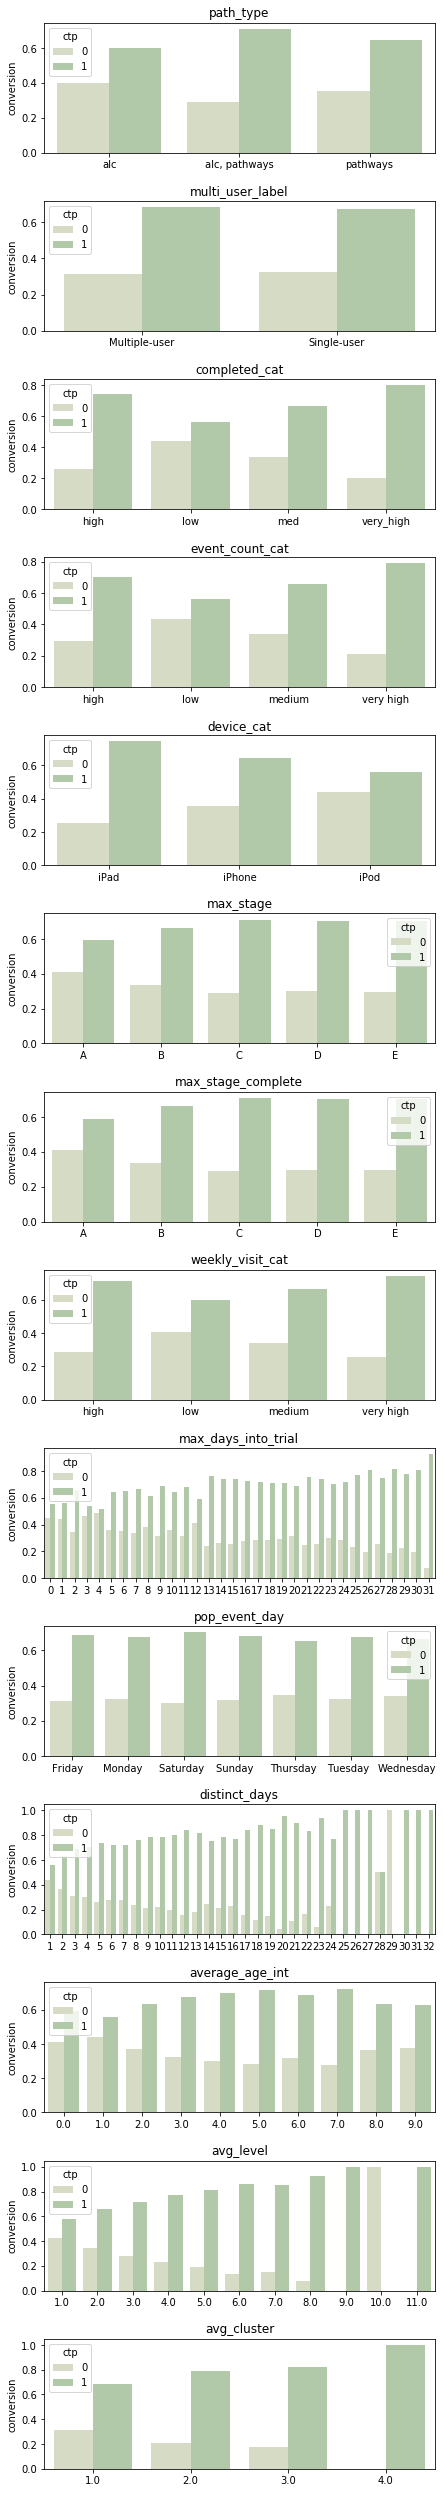

In [436]:
#visualize relationship to conversion rate for categorical variables
categorical_columns = ['path_type','multi_user_label','completed_cat','event_count_cat',
                      'device_cat','max_stage','max_stage_complete','weekly_visit_cat','max_days_into_trial','pop_event_day',
                      'distinct_days', 'average_age_int', 'avg_level','avg_cluster']

conversion_calc(homer, categorical_columns, plot = True)

#### Distributions to look at:
- total_events
- not_completed_count
- ipad_event
- iphone_event
- ipod_event
- avg_weekly_visit
- avg_daily_hrs
- max_row
- max_column
- avg_row
- avg_col
- max_days_into_trial

/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


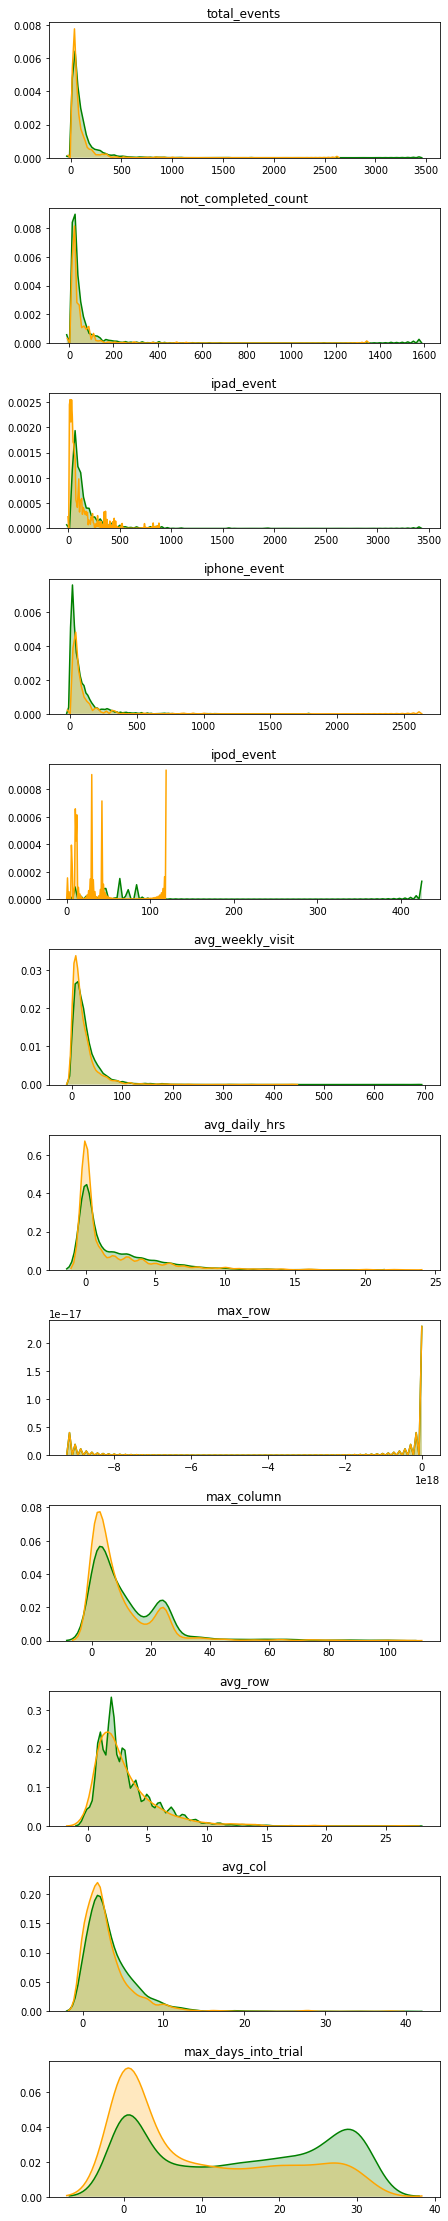

In [437]:
continuous_columns = ['total_events','not_completed_count','ipad_event','iphone_event','ipod_event','avg_weekly_visit',
                     'avg_daily_hrs','max_row','max_column','avg_row','avg_col','max_days_into_trial']

plot_continuous(homer, continuous_columns)

### 2. Data Preprocessing
- adjust for nulls
- make dummy variables: multi_user_label, completed_cat, event_count_cat, device_cat, max_stage_complete,
- max_stage, pop_event_day, pop_title (titles with conversion > baseline only)

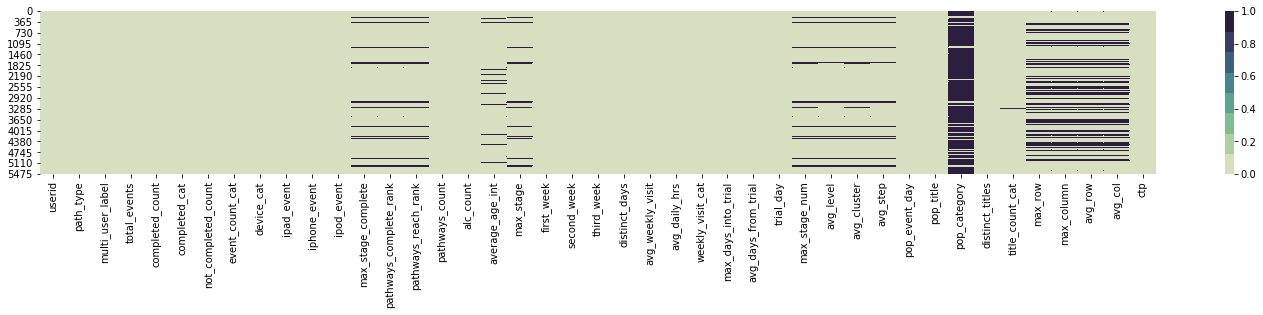

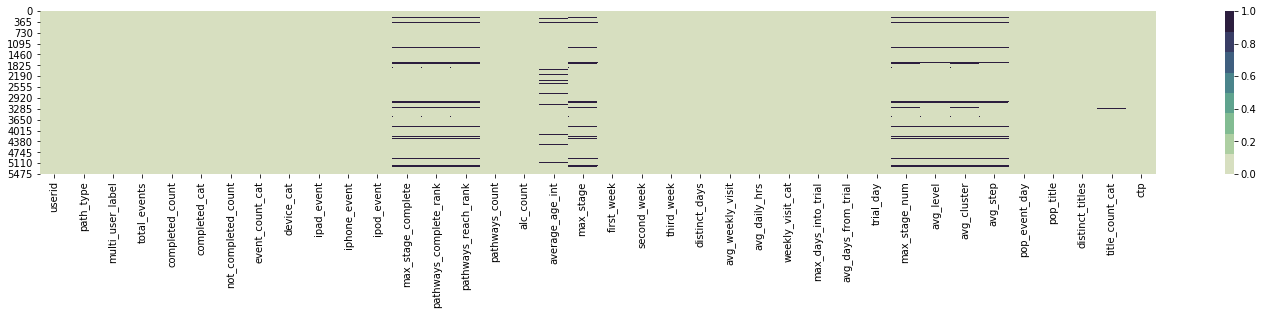

In [551]:
#display missing values before and after removing unecessary columns
plt.rcParams['figure.figsize'] = (25,3)
mypalette = (sns.cubehelix_palette(8, start=.5, rot=-.75))
sns.heatmap(homer.isnull(), cmap = mypalette)
plt.show()

#max_row, max_col, avg_row, avg_col don't seem to have strong correlation with CTP - delete
#pop_category is mostly missing - delete
homer_clean = homer.drop(['max_row','max_column','avg_row','avg_col','pop_category'],inplace = False, axis = 1)

sns.heatmap(homer_clean.isnull(), cmap = mypalette)
plt.show()

#for now, drop any rows with null values - revisit later
#can use knn imputation methods, since using average might not make sense
homer_nonull = homer_clean.dropna().reset_index(drop = True)

In [552]:
#look at conversion rates for top 20 titles
#75% of rows in dataset belong to top 20 titles
alltitles = pd.Series(homer_nonull['pop_title'].unique())
top20titles = homer_nonull['pop_title'].value_counts().nlargest(n=20).index
pop_titles = homer_nonull[homer_nonull['pop_title'].isin(top20titles)]
percent = pop_titles['pop_title'].value_counts().sum()/homer_nonull.shape[0]
print(f'percent of total records with top 20 title: {percent}')

#create indicator columns for titles where the conversion is better than the baseline
title_conversions = conversion_calc(pop_titles, ['pop_title'], False)
best_titles = title_conversions[title_conversions['conversion'] > baseline]['pop_title'].to_list()
print('top 20 most popular titles with high conversion are:')
for element in best_titles:
    print('  -'+element)

percent of total records with top 20 title: 0.7576819962878945
top 20 most popular titles with high conversion are:
  -Angelina: Our Favorite Time of Year is Spring
  -Let's Draw
  -Memory Game: Friends
  -Power Practice
  -Same or Different
  -Sounds Abound
  -Speed Read
  -Teamwork!
  -What's That Sound?


In [553]:
homer_nonull.head()
homer_nonull['pop_title'] = homer_nonull['pop_title'].replace(to_replace = list(non_top_titles),value = None)

dummy_columns = ['path_type','multi_user_label','device_cat','pop_event_day','pop_title']
repeat_categories = ['weekly_visit_cat','title_count_cat','event_count_cat','completed_cat',
                    'max_stage_complete','max_stage']
all_columns = dummy_columns + repeat_categories

#add column name to low/med/high columns so dummy names for these columns are distinct
for column in repeat_categories:
    homer_nonull[column] = column + '_' + homer_nonull[column]

#get dummies only for top titles
non_top_titles = list(alltitles[~alltitles.isin(best_titles)])
homer_nonull['pop_title'] = homer_nonull['pop_title'].replace(non_top_titles,None)
homer_nonull_dummies = pd.get_dummies(homer_nonull[all_columns],prefix = 'cat')
homer_nonull_noncat = homer_nonull[[column for column in homer_nonull.columns if column not in all_columns]]
final = pd.merge(homer_nonull_dummies, homer_nonull_noncat, left_index = True, right_index = True, how = 'outer')

In [554]:
homer_nonull.head()

,userid,path_type,multi_user_label,total_events,completed_count,completed_cat,not_completed_count,event_count_cat,device_cat,ipad_event,iphone_event,ipod_event,max_stage_complete,pathways_complete_rank,pathways_reach_rank,pathways_count,alc_count,average_age_int,max_stage,first_week,second_week,third_week,distinct_days,avg_weekly_visit,avg_daily_hrs,weekly_visit_cat,max_days_into_trial,avg_days_from_trial,trial_day,max_stage_num,avg_level,avg_cluster,avg_step,pop_event_day,pop_title,distinct_titles,title_count_cat,ctp
0,-9.218149e+18,pathways,Single-user,5,4,completed_cat_low,0,event_count_cat_low,iPhone,0,5,0,max_stage_complete_A,121.0,211.0,5,0,1.0,max_stage_A,1,0,1,2,3,0,weekly_visit_cat_low,20,4,1,1.0,1.0,1.0,1.0,Sunday,Letter Hunt,2,title_count_cat_low,0
1,-9.217416e+18,"alc, pathways",Single-user,59,36,completed_cat_med,21,event_count_cat_high,iPhone,0,59,0,max_stage_complete_C,511.0,521.0,40,19,4.0,max_stage_C,1,0,0,2,30,0,weekly_visit_cat_high,5,3,8,3.0,3.0,1.0,6.0,Friday,Letter Hunt,39,title_count_cat_high,0
2,-9.217257e+18,"alc, pathways",Single-user,126,111,completed_cat_very_high,14,event_count_cat_very high,iPad,126,0,0,max_stage_complete_C,351.0,351.0,27,99,4.0,max_stage_C,1,1,1,10,42,3,weekly_visit_cat_very high,16,10,5,3.0,2.0,1.0,6.0,Thursday,Letter Hunt,87,title_count_cat_very high,1
3,-9.212743e+18,"alc, pathways",Multiple-user,144,105,completed_cat_very_high,35,event_count_cat_very high,iPad,144,0,0,max_stage_complete_B,961.0,961.0,64,80,3.0,max_stage_B,1,1,1,14,36,3,weekly_visit_cat_very high,22,7,9,2.0,5.0,1.0,4.0,Tuesday,Letter Hunt,87,title_count_cat_very high,1
4,-9.201151e+18,"alc, pathways",Single-user,91,71,completed_cat_very_high,14,event_count_cat_high,iPad,91,0,0,max_stage_complete_D,1111.0,1121.0,88,3,6.0,max_stage_D,1,0,0,4,91,7,weekly_visit_cat_very high,3,2,9,4.0,7.0,1.0,5.0,Wednesday,What's That Sound?,38,title_count_cat_high,1


### 3. Model 1: KNN

In [555]:
#confirm all types are numeric and no nulls
print(final.dtypes.unique())
print(final.isnull().sum().unique())
print(final.columns)

[dtype('uint8') dtype('float64') dtype('int64')]
[0]
Index(['cat_alc, pathways', 'cat_pathways', 'cat_Multiple-user',
       'cat_Single-user', 'cat_iPad', 'cat_iPhone', 'cat_iPod',
       'cat_Friday   ', 'cat_Monday   ', 'cat_Saturday ', 'cat_Sunday   ',
       'cat_Thursday ', 'cat_Tuesday  ', 'cat_Wednesday',
       'cat_Angelina: Our Favorite Time of Year is Spring', 'cat_Let's Draw',
       'cat_Letter Hunt', 'cat_Memory Game: Friends', 'cat_Power Practice',
       'cat_Same or Different', 'cat_Sounds Abound', 'cat_Speed Read',
       'cat_Teamwork!', 'cat_What's That Sound?', 'cat_weekly_visit_cat_high',
       'cat_weekly_visit_cat_low', 'cat_weekly_visit_cat_medium',
       'cat_weekly_visit_cat_very high', 'cat_title_count_cat_high',
       'cat_title_count_cat_low', 'cat_title_count_cat_med',
       'cat_title_count_cat_very high', 'cat_event_count_cat_high',
       'cat_event_count_cat_low', 'cat_event_count_cat_medium',
       'cat_event_count_cat_very high', 'cat_complete

In [695]:
X = final[[column for column in final.columns if column != 'ctp']]
y = final['ctp']

#create function to optimize for k, weights, and train test split
test_splits = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
weights = ['distance','uniform']
k_neighbors = range(1,15)

def optimize_knn(X, y, test_splits, weights, k_neighbors):
    results = []
    for split in test_splits:
        for weight in weights:
            for k in k_neighbors:
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split)
                knn = KNeighborsClassifier(n_neighbors = k, weights = weight)
                knn.fit(X_train, y_train)
                testscore = knn.score(X_test, y_test)
                trainscore = knn.score(X_train, y_train)
                results.append((split, weight, k, trainscore, testscore))
    knn_results = pd.DataFrame(results, columns = ['test_split','weight','k','train_score','test_score'])
    return knn_results

def plot_knn(df, knn_graphs):
    plt.rcParams['figure.figsize'] = (11,15)
    figure, axes = plt.subplots(len(knn_graphs))
    for i, combo in enumerate(knn_graphs):
        if len(combo) == 3:
            sns.boxplot(x=df[combo[0]], y = df[combo[1]], hue = df[combo[2]], ax = axes[i], palette = 'YlGnBu')
        else:
            sns.boxplot(x=df[combo[0]], y = df[combo[1]], ax = axes[i], palette = 'YlGnBu')
    figure.subplots_adjust(hspace = 0.45)

### KNN results:
- uniform weights has better overall performance, though greater variance than distance metric
- no clear relationship between test split on test score / train score
- test score generally increases with k
- k doesn't impact train score, besides when k = 1 (100% accuracy, choosing the point itself)
- best model achieves 70% accuracy on test set

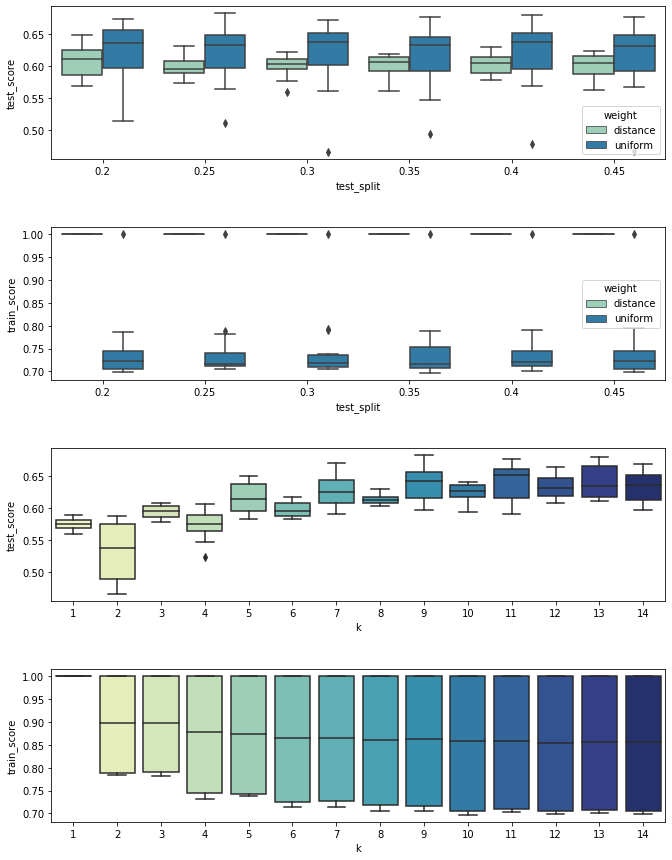

In [696]:
knn = optimize_knn(X, y, test_splits, weights, k_neighbors)

knn_graphs = [('test_split', 'test_score', 'weight'),
             ('test_split', 'train_score', 'weight'),
             ('k', 'test_score'),
             ('k', 'train_score')]

plot_knn(knn, knn_graphs)

In [694]:
best = knn[knn['test_score']==knn['test_score'].max()]
print(f'''Best knn model: 
 - test split: {best.iloc[0][0]}
 - weight: {best.iloc[0][1]}
 - neighbors: {best.iloc[0][2]}
 - train_score: {best.iloc[0][3]}
 - test_score: {best.iloc[0][4]}''')
     

Best knn model: 
 - test split: 0.2
 - weight: uniform
 - neighbors: 11
 - train_score: 0.7037896365042536
 - test_score: 0.6896907216494845


In [ ]:
test